# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [38]:
import urllib
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
req = urllib.request.urlopen('https://rate.bot.com.tw/xrt?Lang=zh-TW')
response = req.read().decode('utf-8')
resp = BeautifulSoup(response)
r_table = resp.find('tbody').find_all('tr')
# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = r_table[0].find('div', class_='visible-phone print_hide').text.strip().rstrip()
in_rate = r_table[0].find('td', attrs={'data-table':'本行現金買入'}).text
out_rate = r_table[0].find('td', attrs={'data-table':'本行現金賣出'}).text
print('%s：現金買入: %s, 現金賣出: %s' % (currency, in_rate, out_rate))

美金 (USD)：現金買入: 29.91, 現金賣出: 30.58


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [46]:
rate_list = []
for rate in r_table:
    currency = rate.find('div', class_='visible-phone print_hide').text.strip().rstrip()
    in_rate = rate.find('td', attrs={'data-table':'本行現金買入'}).text
    out_rate = rate.find('td', attrs={'data-table':'本行現金賣出'}).text
    hist = rate.find('td', attrs={'data-table':'歷史匯率'}).a['href']
    rate_list.append(dict(name=currency, buy=in_rate, sell=out_rate, hist='https://rate.bot.com.tw' + hist))
    print('%s：\t現金買入: %s, 現金賣出: %s' % (currency, in_rate, out_rate))

美金 (USD)：	現金買入: 29.91, 現金賣出: 30.58
港幣 (HKD)：	現金買入: 3.727, 現金賣出: 3.931
英鎊 (GBP)：	現金買入: 39.49, 現金賣出: 41.61
澳幣 (AUD)：	現金買入: 20.6, 現金賣出: 21.38
加拿大幣 (CAD)：	現金買入: 22.53, 現金賣出: 23.44
新加坡幣 (SGD)：	現金買入: 21.84, 現金賣出: 22.75
瑞士法郎 (CHF)：	現金買入: 30.01, 現金賣出: 31.21
日圓 (JPY)：	現金買入: 0.2672, 現金賣出: 0.28
南非幣 (ZAR)：	現金買入: -, 現金賣出: -
瑞典幣 (SEK)：	現金買入: 2.85, 現金賣出: 3.37
紐元 (NZD)：	現金買入: 19.59, 現金賣出: 20.44
泰幣 (THB)：	現金買入: 0.8792, 現金賣出: 1.0672
菲國比索 (PHP)：	現金買入: 0.5251, 現金賣出: 0.6581
印尼幣 (IDR)：	現金買入: 0.00183, 現金賣出: 0.00253
歐元 (EUR)：	現金買入: 33.03, 現金賣出: 34.37
韓元 (KRW)：	現金買入: 0.02411, 現金賣出: 0.02801
越南盾 (VND)：	現金買入: 0.00093, 現金賣出: 0.00143
馬來幣 (MYR)：	現金買入: 6.213, 現金賣出: 7.857
人民幣 (CNY)：	現金買入: 4.246, 現金賣出: 4.408


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

<Figure size 720x576 with 0 Axes>

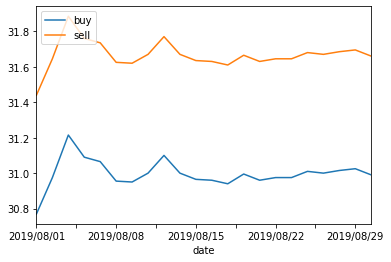

In [68]:
#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
hist_link = ''
for rate in rate_list:
    if rate['name'] == '美金 (USD)':
        hist_link = rate['hist']
        break
url = hist_link.replace("history", "quote/2019-08")
req = urllib.request.urlopen(url)
response = req.read().decode('utf-8')
resp = BeautifulSoup(response)
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
hr_table = resp.find('tbody').find_all('tr')
hr_dict = {'date':[], 'buy':[], 'sell':[]}
for hr in hr_table:
    date = hr.find('td', class_='text-center').a.text
    rates = hr.find_all('td', class_="rate-content-cash text-right print_table-cell")
    buy = rates[0].text
    sell = rates[1].text
    hr_dict['date'].append(date)
    hr_dict['buy'].append(float(buy))
    hr_dict['sell'].append(float(sell))
# print(hr_dict)
rate_pd = pd.DataFrame(hr_dict)
rate_pd = rate_pd.set_index('date')
rate_pd = rate_pd.sort_index(ascending=True)
# print(rate_pd)
# # 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
rate_pd[['buy','sell']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金 (USD)


<Figure size 720x576 with 0 Axes>

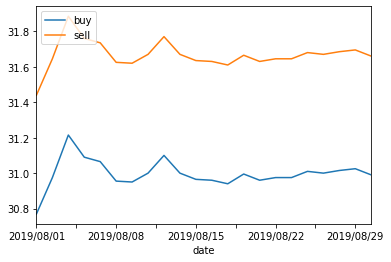

港幣 (HKD)


<Figure size 720x576 with 0 Axes>

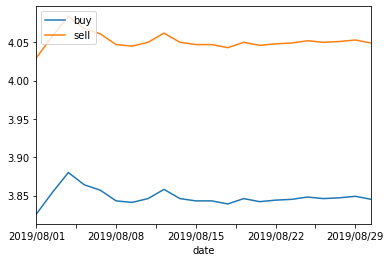

英鎊 (GBP)


<Figure size 720x576 with 0 Axes>

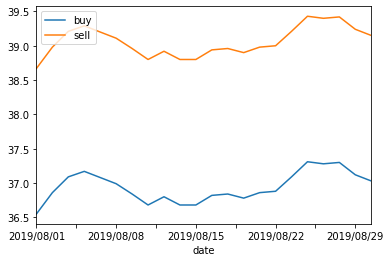

澳幣 (AUD)


<Figure size 720x576 with 0 Axes>

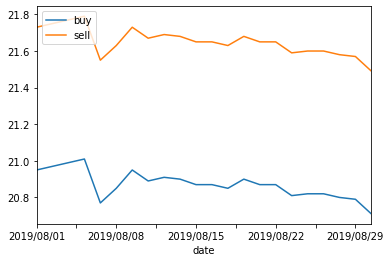

加拿大幣 (CAD)


<Figure size 720x576 with 0 Axes>

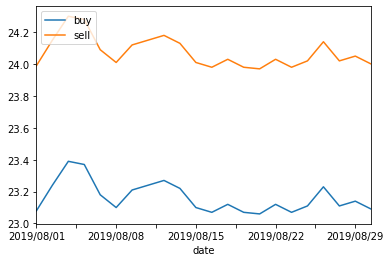

新加坡幣 (SGD)


<Figure size 720x576 with 0 Axes>

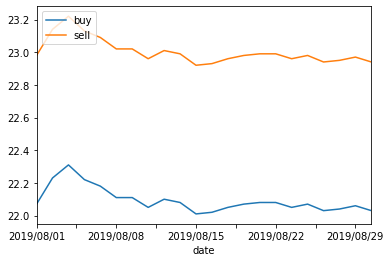

瑞士法郎 (CHF)


<Figure size 720x576 with 0 Axes>

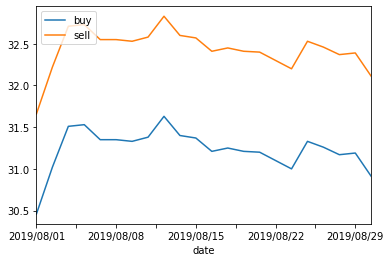

日圓 (JPY)


<Figure size 720x576 with 0 Axes>

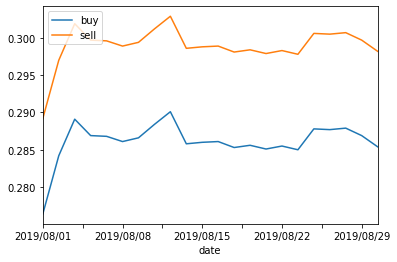

南非幣 (ZAR)


<Figure size 720x576 with 0 Axes>

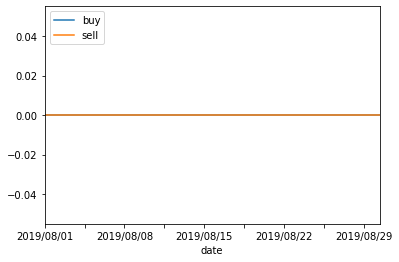

瑞典幣 (SEK)


<Figure size 720x576 with 0 Axes>

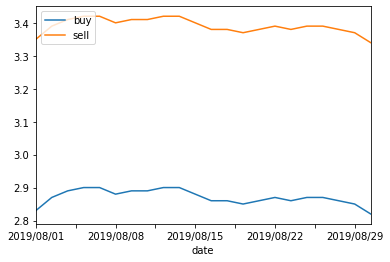

紐元 (NZD)


<Figure size 720x576 with 0 Axes>

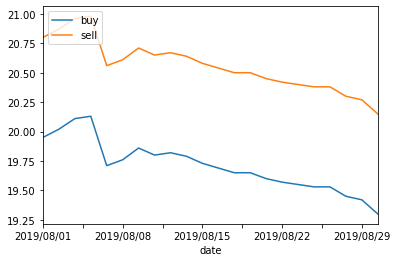

泰幣 (THB)


<Figure size 720x576 with 0 Axes>

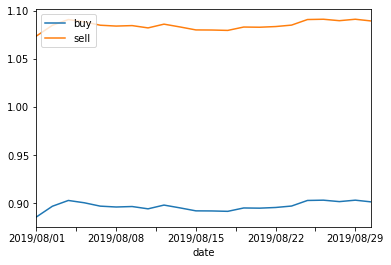

菲國比索 (PHP)


<Figure size 720x576 with 0 Axes>

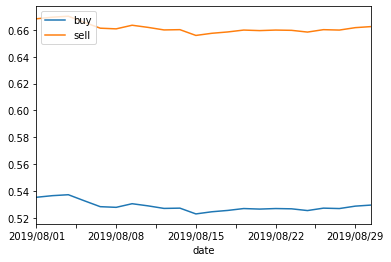

印尼幣 (IDR)


<Figure size 720x576 with 0 Axes>

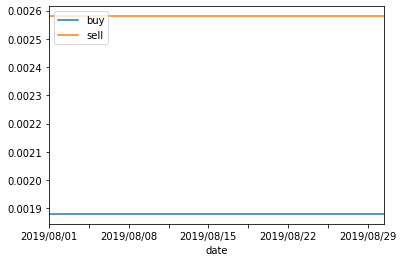

歐元 (EUR)


<Figure size 720x576 with 0 Axes>

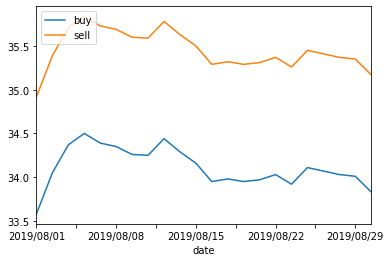

韓元 (KRW)


<Figure size 720x576 with 0 Axes>

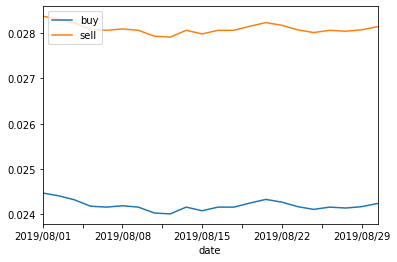

越南盾 (VND)


<Figure size 720x576 with 0 Axes>

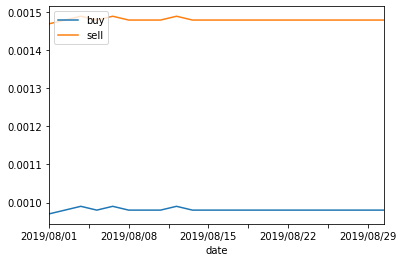

馬來幣 (MYR)


<Figure size 720x576 with 0 Axes>

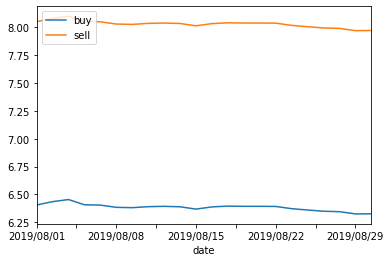

人民幣 (CNY)


<Figure size 720x576 with 0 Axes>

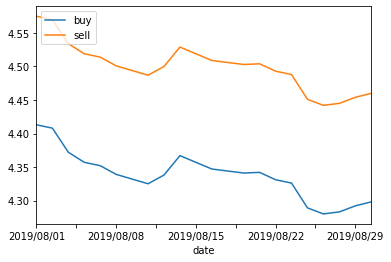

In [70]:
hist_link = ''
for rate in rate_list:
    print(rate['name'])
    hist_link = rate['hist']
    url = hist_link.replace("history", "quote/2019-08")
    req = urllib.request.urlopen(url)
    response = req.read().decode('utf-8')
    resp = BeautifulSoup(response)
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    hr_table = resp.find('tbody').find_all('tr')
    hr_dict = {'date':[], 'buy':[], 'sell':[]}
    for hr in hr_table:
        date = hr.find('td', class_='text-center').a.text
        rates = hr.find_all('td', class_="rate-content-cash text-right print_table-cell")
        buy = rates[0].text
        sell = rates[1].text
        hr_dict['date'].append(date)
        hr_dict['buy'].append(float(buy))
        hr_dict['sell'].append(float(sell))
    # print(hr_dict)
    rate_pd = pd.DataFrame(hr_dict)
    rate_pd = rate_pd.set_index('date')
    rate_pd = rate_pd.sort_index(ascending=True)
    # print(rate_pd)
    # # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    rate_pd[['buy','sell']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()